In [1]:
import numpy as np
import matplotlib.pyplot as plt
from q_learning.algorithm import QLearningAlgo, QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd
import torch

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:
pl = QLPolicy.load('tmp/q_learning/q_policy_best_untrained_model_aeq_113421.pkl')
pl.q_table

{80869.0: array([159721.88727562, 160226.18974452, 160429.66750567, 160940.83574489,
        159381.22799454, 160824.08193187, 159974.01635139, 160041.54649163,
        160656.03587259, 159984.75857929, 160597.13645705, 160608.28828651,
        160268.35358437, 169660.96891889, 159649.79784187, 159830.99855157,
        159779.5019609 , 160768.46986599, 159346.69323146, 160172.40200732,
        159657.8591524 , 160939.79262161, 160469.27246306, 159389.62159419,
        160045.48217245, 159520.20807131, 159977.78122683])}

In [4]:
model = torch.load('tmp/state_quantization/untrained_model_aeq')
for param in model.parameters():
  print(param.data)

model = torch.load('tmp/state_quantization/untrained_model_h_c')
for param in model.parameters():
  print(param.data)

tensor([[-1.3435e-01,  9.0507e-02, -1.3238e-01,  1.8675e-01,  2.6236e-02,
          4.4155e-02],
        [ 1.4408e-01,  1.0649e-01, -8.0990e-02, -2.1598e-01, -1.6068e-01,
          1.4599e-01],
        [ 1.1428e-01,  1.5405e-01, -3.5854e-02,  1.9228e-01,  1.0519e-01,
         -1.4666e-01],
        [-1.6798e-01,  7.8967e-02,  3.5079e-05, -6.9647e-02,  1.2494e-01,
          4.1671e-03],
        [-1.0711e-01,  8.3170e-02,  2.2407e-02, -1.2115e-01, -1.8811e-01,
          1.8149e-01],
        [-2.0475e-01, -1.3645e-01, -1.4359e-01,  3.7230e-02,  2.0407e-02,
         -1.2635e-02],
        [-7.3662e-02, -8.9071e-02, -1.5437e-01, -6.5207e-02, -2.4607e-03,
         -2.1497e-01],
        [ 7.9664e-02, -6.3301e-02,  4.9873e-02, -2.7057e-02, -1.2852e-01,
         -2.6723e-02],
        [ 1.7362e-02, -1.4695e-01, -1.5570e-02,  1.8558e-01,  2.0722e-01,
          1.4988e-01],
        [ 9.2747e-03, -1.9672e-01, -1.7559e-01,  7.1781e-02,  1.6702e-01,
          4.2760e-02],
        [-1.3401e-01, -2.7180e

In [5]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_h_c', 'model_final_h', 'model_aeq']
q_policies_path = 'tmp/q_learning'
model_files = {model_name: glob(f'{q_policies_path}/*{model_name}*' ) for model_name in model_names}


Episode 9 Reward: -190.50338401453664 || New State Found: False


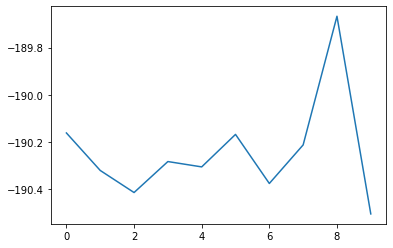

Reward Mean: -190.24032490330222
Reward std : 0.21684344218420043


In [6]:
benchmarks = {}
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = QLPolicy.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs)
        evaluator.evaluate(epochs=10)

        benchmarks.update({policy_file.split('/')[-1].split('.')[0]: {'reward': np.mean(evaluator.eval_rewards_per_epoch), 'std':np.std(evaluator.eval_rewards_per_epoch)}})

In [7]:
#df = pd.concat({k: pd.DataFrame(v).T for k, v in benchmarks.items()}, axis=0)
df = pd.DataFrame(benchmarks).T
df

,reward,std
q_policy_untrained_model_h_c_113421,-309.556399,16.920351
q_policy_model_h_c_224235,-387.050420,60.789199
q_policy_best_model_h_c_881643,-201.018053,20.985373
q_policy_best_model_h_c_822519,-187.510770,1.028842
q_policy_best_untrained_model_h_c_822519,-416.444480,184.419006
q_policy_best_model_h_c_282129,-188.059524,1.416887
q_policy_model_h_c,-319.333891,75.223924
q_policy_model_h_c_300633,-199.097483,1.825245
q_policy_best_untrained_model_h_c_113421,-381.809311,130.255667
q_policy_model_h_c_282129,-236.158640,5.846464
